## Final Project Submission

* Student name: Ismael Araujo
* Student pace: full time
* Scheduled project review date/time: October 2, 2020
* Instructor name: Fangfang
* Blog post URL:


# Overview
- The purpose of this project is identify the type of movies are currently doing the best in the box office and draw recommendations for a movie studio based on relevant data
- The approach was use multiple datasets to analyse group of genres as well as individual genres, budget, box office, and ROI.

# Business Problem

Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry. 

<strong>Your team is charged with exploring what type of films are currently doing the best at the box office</strong>. You must then translate those findings into actionable <strong>insights</strong> that the head of Microsoft's new movie studio can use to help <strong>decide what type of films to create</strong>.

# Questions:

1. Is there any connection between the top 20 most profitable movies of all times?
2. Does higher budget reflect in higher profits?
3. What are the top 10 genres with the most movies launched since 1990?
4. What groups of genres bring the highest box office revenue and ROI?
5. What genres bring the highest box office revenue and ROI?

# Sections Summary:

1. Importing Libraries and Datasets
2. Initial Data Wrangling
3. Cleaning the Data
4. Exploring the Data
5. Genres With The Highest Release Of Movies
6. Correlation Between a Higher Budget and Higher Profits
7. Other Correlations
8. Most Profitable Genres Group
9. Most Profitable Individual Genres
10. Final Takeaways and Recomendations

# 1. Importing Libraries and Datasets

### 1.1 Import libraries

In [1]:
# Install xlrd to use the read_excel method
!pip install xlrd

# Import libraries
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
# This will force Pandas to show all the DataFrame's rows
pd.set_option('display.max_columns', None)

### 1.2 Import files needed to investigate the data

In [2]:
# Import files that I'll need to investigate the data
df_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz', compression='gzip')
df_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz', compression='gzip')
df_akas = pd.read_csv('zippedData/imdb.title.akas.csv.gz', compression='gzip')
df_imdb = pd.read_excel('zippedData/movies_metadata.xlsx')
df_movies = pd.read_excel('zippedData/IMDb-movies.xlsx')

### Findings:

- One of the data sets is taking a few seconds to load. I'll filter out the irrelevant data to improve the speed.

### Next Steps:

- Start investigating the DataFrames.

# 2. Initial Data Wrangling

- Open the DataFrames and understand their dimensions and what type of data is available

Note: The cells in this section DOES NOT affect other sections of this notebook.

### 2.1 imdb.title.basics.csv imported as df_basics

In [3]:
# Start investigating the data sets using .head(1) to see only the first row of the DataFrame
df_basics.head(1)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"


In [4]:
# Using .shape to see understand the DataFrame's dimmensions
df_basics.shape

(146144, 6)

### 2.2 imdb.title.ratings.csv  imported as df_ratings

In [5]:
df_ratings.head(1)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31


In [6]:
df_ratings.shape

(73856, 3)

### 2.3 imdb.title.ratings.csv.gz imported as df_akas

In [7]:
df_akas.head(1)

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0


In [8]:
df_akas.shape

(331703, 8)

### 2.4 movies_metadata.xlsx imported as df_imdb

In [9]:
df_imdb.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,190269,tt0020217,en,New York Nights,Show girl Jill Deverne is married to song writ...,0.657513,/8Af9KCVMLXY9baR5CfilAms9OT2.jpg,"[{'name': 'Joseph M. Schenck Production', 'id'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2029-12-28,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,New York Nights,False,0.0,0


In [10]:
df_imdb.shape

(30379, 24)

In [11]:
df_imdb[df_imdb['original_title'] =='Titanic']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
26221,False,NaN,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.titanicmovie.com,597,tt0120338,en,Titanic,"84 years later, a 101-year-old woman named Ros...",26.889070,/kHXEpyfl6zqn8a6YuozZUujufXf.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1997-11-18,1845034188,194.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Nothing on Earth could come between them.,Titanic,False,7.5,7770
26889,False,NaN,13000000,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,2699,tt0115392,en,Titanic,A story of the romances of two couples upon th...,3.435807,/AosgVsKPbLctVQ8hd8shEj7LJrZ.jpg,"[{'name': 'American Zoetrope', 'id': 70}]","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1996-11-17,0,173.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Titanic,False,6.3,45


### 2.5 IMDb-movies.xlsx imported as df_movies

In [12]:
df_movies.head(1)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0420715,Khakestar-o-khak,Khakestar-o-khak,2004,2005-01-05 00:00:00,Drama,102,"Afghanistan, France","Dari, Pushto",Atiq Rahimi,"Kambuzia Partovi, Atiq Rahimi",Afghanfilm,"Abdul Ghani, Jawan Mard Homayoun, Sher Agah, K...",Elderly Dastaguir and his newly deaf 5-year-ol...,7.8,448,NaN,NaN,9530.0,NaN,3.0,10.0


In [13]:
df_movies.shape

(85854, 22)

### Findings:

- The data I need is spread in multiple DataFrames
- The IMDb data sets have an ID number, which will help me to merge my the DataFrames
- There are multiple columns will not be needed and multiple rows with empty values
- The df_movies and df_imdb DataFrames is taking a few seconds to load

### Next Steps:

- Since Microsoft is an American company, only movies made by American studios will be used.

# 3. Cleaning the Data

- Rename columns
- Set new indexes
- Merge DataFrames
- Remove data that I will not need

### 3.1 Rename Columns

- Create a pattern between the DataFrames that contains a column with an IMDb ID number and have named them imdb_id

In [14]:
# Use .rename to rename columns
df_basics.rename(columns={'tconst':'imdb_id'}, inplace=True)
df_akas.rename(columns={'title_id':'imdb_id'}, inplace=True)
df_ratings.rename(columns={'tconst':'imdb_id'}, inplace=True)
df_movies.rename(columns={'imdb_title_id':'imdb_id'}, inplace=True)

### 3.2 Set and match indexes
- Set all the imdb_id columns as an index. It will help when these DataFrames are merged.

In [15]:
# Use .set_index to set imdb_id as the new index
df_basics.set_index('imdb_id', inplace=True)
df_ratings.set_index('imdb_id', inplace=True)
df_akas.set_index('imdb_id', inplace=True)
df_imdb.set_index('imdb_id', inplace=True)
df_movies.set_index('imdb_id', inplace=True)

### 3.3 Join DataFrames

In [16]:
# Joining the df_basics and df_akas dataframes. 'df_ba' stands for DataFrame Basics & Akas
df_ba = df_basics.join(df_akas)
df_ba.head(1)

,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title
imdb_id,,,,,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1.0,Sangharsh,IN,hi,NaN,alternative transliteration,0.0


In [17]:
# Joining the df_ba and df_ratings dataframes. 'bar' stands for DataFrame Basics, Akas & Ratings
df_bar = df_ba.join(df_ratings)
df_bar.head(1)

,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title,averagerating,numvotes
imdb_id,,,,,,,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1.0,Sangharsh,IN,hi,NaN,alternative transliteration,0.0,7.0,77.0


### 3.4 Drop all movies that weren't produced by studios in the US

Note: Since Microsoft is an American company and the US is the largest market for movies, I will work only with movies produced in the US.

In [18]:
# Using print(x.shape) to see the dimmensions of more than one DataFrame at once
print(df_bar.shape)
# Checking the size of the DataFrame if I filter all the rows that don't contain 'US' under region
print(df_bar[df_bar.region == 'US'].shape)

(355545, 14)
(51490, 14)


In [19]:
# Filtering out all rows that don't contain 'US' under 'region'
df_bar = df_bar[df_bar.region == 'US']
# Checking the shape. It matches to what was predicted in the cell above
df_bar.shape

(51490, 14)

In [20]:
print(df_bar.shape)
print(df_movies.shape)
# Checking the size of the DataFrame if I filter all the rows that don't contain 'USA' under country
print(df_movies[df_movies.country == 'USA'].shape)

(51490, 14)
(85854, 21)
(30909, 21)


In [21]:
# Filtering out all rows that don't contain 'US' under 'region'
df_movies = df_movies[df_movies.country == 'USA']
df_movies.shape

(30909, 21)

In [22]:
# Joining df_movies and df_bar and using rsuffic to avoid conflicts between columns with the same name
df_mbar = df_movies.join(df_bar,rsuffix='_bar')

In [23]:
# Checking if it worked
df_mbar.head(1)

,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,primary_title,original_title_bar,start_year,runtime_minutes,genres,ordering,title_bar,region,language_bar,types,attributes,is_original_title,averagerating,numvotes
imdb_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Checking the size of the DataFrame
df_mbar.shape

(33081, 35)

Note: the df_imdb has multiple columns with the same name as df_bar. Thus, I create another data frame with the values needed before merging it with my df_bar data frame.

In [25]:
# Create new dataframe with the columns that are relevant. df_br stands for DataFrame Budget & Revenue
df_br = df_imdb.filter(['imdb_id','budget','revenue'], axis=1)
df_br.head(1)

,budget,revenue
imdb_id,,
tt0020217,0,0


In [26]:
# This DataFrame will be the main one. Using rsuffix to avoid conflict between columns with the same name
df = df_mbar.join(df_br,rsuffix='_br')
df.head(1)

,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,primary_title,original_title_bar,start_year,runtime_minutes,genres,ordering,title_bar,region,language_bar,types,attributes,is_original_title,averagerating,numvotes,budget_br,revenue
imdb_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.5 Add data to NaN values 

The objective is to use fillna to add values to rows with NaN values.

In [27]:
# Checking null values in the DataFrame
df.isna().sum()

title                        1
original_title               1
year                         0
date_published               0
genre                        0
duration                     0
country                      0
language                   370
director                    36
writer                     217
production_company        1234
actors                      27
description                 80
avg_vote                     0
votes                        0
budget                   19809
usa_gross_income         22934
worlwide_gross_income    22499
metascore                23822
reviews_from_users         355
reviews_from_critics      2044
primary_title            22675
original_title_bar       22675
start_year               22675
runtime_minutes          22948
genres                   22675
ordering                 22675
title_bar                22675
region                   22675
language_bar             32807
types                    30643
attributes               32287
is_origi

In [28]:
# Using .fillna() to replace null values with values from another columns
df.budget.fillna(df.budget_br,inplace=True)
df.worlwide_gross_income.fillna(df.revenue,inplace=True)
df.budget_br.fillna(df.budget,inplace=True)
df.revenue.fillna(df.worlwide_gross_income,inplace=True)
df.genres.fillna(df.genre,inplace=True)
df.usa_gross_income .fillna(df.worlwide_gross_income,inplace=True)

In [29]:
# Checking if fillna() worked
df.isna().sum()

title                        1
original_title               1
year                         0
date_published               0
genre                        0
duration                     0
country                      0
language                   370
director                    36
writer                     217
production_company        1234
actors                      27
description                 80
avg_vote                     0
votes                        0
budget                   15776
usa_gross_income         18628
worlwide_gross_income    19263
metascore                23822
reviews_from_users         355
reviews_from_critics      2044
primary_title            22675
original_title_bar       22675
start_year               22675
runtime_minutes          22948
genres                       0
ordering                 22675
title_bar                22675
region                   22675
language_bar             32807
types                    30643
attributes               32287
is_origi

Great! Now we have only movies produced by American studios available for analysis. 

### 3.6 Drop columns

Note: I decided to drop the columns 'primary_title' and 'original_title' because their meanings sound ambiguous. The column 'title' is more straight forward.

In [30]:
# Checking what columns I have
df.columns

Index(['title', 'original_title', 'year', 'date_published', 'genre',
       'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics', 'primary_title',
       'original_title_bar', 'start_year', 'runtime_minutes', 'genres',
       'ordering', 'title_bar', 'region', 'language_bar', 'types',
       'attributes', 'is_original_title', 'averagerating', 'numvotes',
       'budget_br', 'revenue'],
      dtype='object')

In [31]:
# Dropping unnecessary data
df.drop(columns=['title','director','writer','actors','description',\
                 'primary_title','original_title_bar','start_year','language','ordering',\
                 'title_bar','region','language_bar','types','attributes','is_original_title',\
                 'budget_br','revenue','runtime_minutes','numvotes','votes', 'reviews_from_users',\
                 'reviews_from_critics','averagerating','date_published'
                 
                ], inplace=True)

In [32]:
# Checking if it worked
df.head(1)

,original_title,year,genre,duration,country,production_company,avg_vote,budget,usa_gross_income,worlwide_gross_income,metascore,genres
imdb_id,,,,,,,,,,,,
tt0000009,Miss Jerry,1894,Romance,45,USA,Alexander Black Photoplays,5.9,NaN,NaN,NaN,NaN,Romance


In [33]:
# Checking the new DataFrame shape
df.shape

(33087, 12)

In [34]:
# Drop duplicated indexes
df = df[~df.index.duplicated(keep='last')]

In [35]:
# Checking new shape of the DataFrame
df.shape

(30909, 12)

# 4. Exploring the Data
- New movies throughout the year

### 4.1 First visualization 
- Use data visualization tools to understand the datasets better and if there are outliers that could break the analysis.



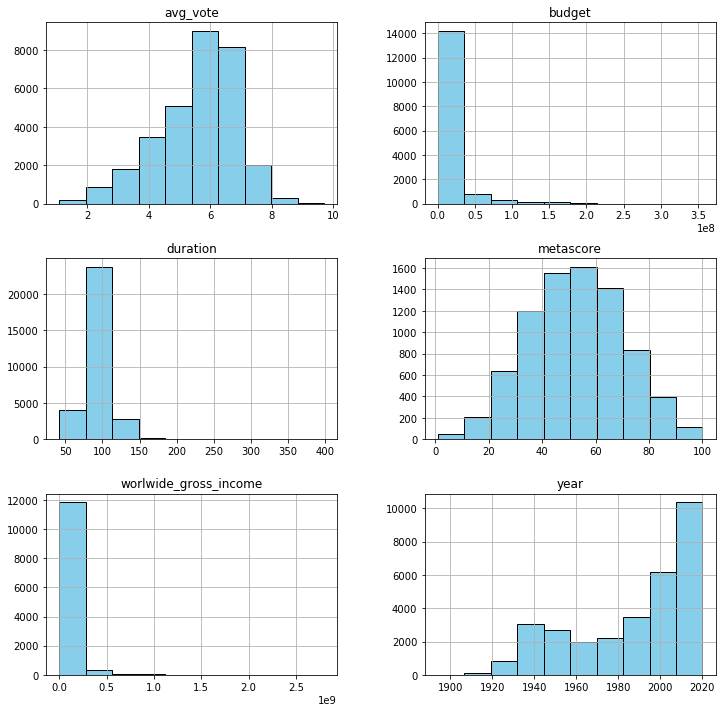

In [36]:
# Using a DataFrame histogram plot to better visualize the dimentions of the values in the DataFrame
df.hist(color='skyblue',edgecolor='black',figsize= (12,12));

In [37]:
# Checking the types of data
df.dtypes

original_title            object
year                       int64
genre                     object
duration                   int64
country                   object
production_company        object
avg_vote                 float64
budget                   float64
usa_gross_income          object
worlwide_gross_income    float64
metascore                float64
genres                    object
dtype: object

### 4.2 Use only movies launched between 1990 and 2020

In the 1990s, there was a <a href='https://theface.com/culture/do-the-right-thing-to-the-matrix-how-the-nineties-changed-cinema-forever'>revolution in the movie industry that changed the sector forever</a>. With new technologies, we can create movies in CGI and many other new technologies. It was a new era in the movies. Thus, it's safe to say that we will have a scenario closer to the actual scenario if we use movies produced between 1990 and 2020.

In [38]:
# Checking the timeframe of my DataFrame
print(df.year.min())
print(df.year.max())

1894
2020


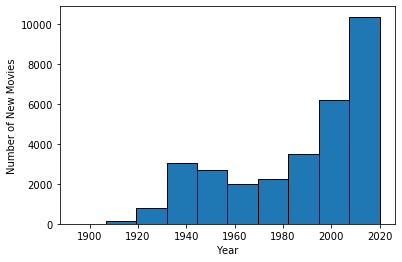

In [39]:
# Creating a histogram with the start_year columns
x = df.year
plt.hist(x, bins=10,edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Number of New Movies')
plt.show()

In [40]:
# Filtering my DataFrame to only have movies launched between 1990 and 2020
df = df[df.year >= 1990]
print(df.year.min())
print(df.year.max())

1990
2020


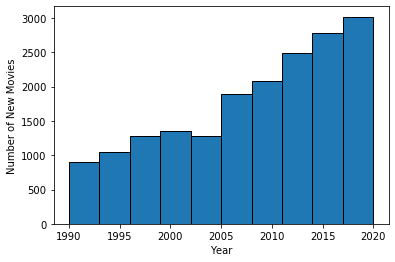

In [41]:
# Plotting a histogram to visualize when the movies were launched
x = df.year
plt.hist(x, bins=10,edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Number of New Movies')
plt.show()

# 5. Genres With The Highest Number of Movies Released

### Objectives:
- Answer my first question: What genres have the highest release of movies between 1990 and 2020
- Drop NaN values from the genres column
- Separate the genre column that contains more that one genre

### 5.1 Drop NaN values under the genres column

In [42]:
# Droping rows with missing values in the genres column
df.dropna(subset=['genres'], inplace=True)  

Now that the null values under the genres(last column) column are deleted, I noticed that there are movies with more than one genre. I'll separate them into three columns. I'll use these columns to create a dictionary that will show me how many movies were launched for each value.
I will keep the column genre (4th column) as it is for now. It will be used to further analysis.

### 5.2 Separate values under the genres columns into different columns

In [43]:
# Separanting the genres columns into three genres using the comma as a dividing point
df[['genre_1','genre_2','genre_3']] =  df.genre.str.split(',',expand=True,)
df.head(1)

,original_title,year,genre,duration,country,production_company,avg_vote,budget,usa_gross_income,worlwide_gross_income,metascore,genres,genre_1,genre_2,genre_3
imdb_id,,,,,,,,,,,,,,,
tt0035423,Kate & Leopold,2001,"Comedy,Fantasy,Romance",118,USA,Konrad Pictures,6.4,48000000.0,47121859,76019048.0,44.0,"Comedy,Fantasy,Romance",Comedy,Fantasy,Romance


In [44]:
# Counting null values in the new genres columns
print(df.genre_1.isna().sum())
print(df.genre_2.isna().sum())
print(df.genre_3.isna().sum())

0
4863
10529


Awesome. The genres are separated.

### 5.3 Create a dictionary that counts genres

In [45]:
# Using groupby to turn the new genres columns into a dictionary
genre_1 = dict(df.groupby(['genre_1']).size())
genre_2 = dict(df.groupby(['genre_2']).size())
genre_3 = dict(df.groupby(['genre_3']).size())

In [46]:
# Using Counter to sum the dictionary values together
genres_dict = dict(Counter(genre_1)+Counter(genre_2)+Counter(genre_3))
genres_dict

{'Action': 3133,
 'Adventure': 1599,
 'Animation': 418,
 'Biography': 444,
 'Comedy': 6301,
 'Crime': 2380,
 'Drama': 8676,
 'Family': 992,
 'Fantasy': 947,
 'History': 184,
 'Horror': 3621,
 'Music': 343,
 'Musical': 137,
 'Mystery': 1353,
 'Romance': 2568,
 'Sci-Fi': 1318,
 'Sport': 319,
 'Thriller': 3894,
 'War': 146,
 'Western': 181,
 'News': 1,
 'Reality-TV': 1}

### 5.4 Create a bar plot for the top genres

In [47]:
# Setting up x and y values using the dictionaries keys and values
x2 = genres_dict.keys()
y2 = genres_dict.values()

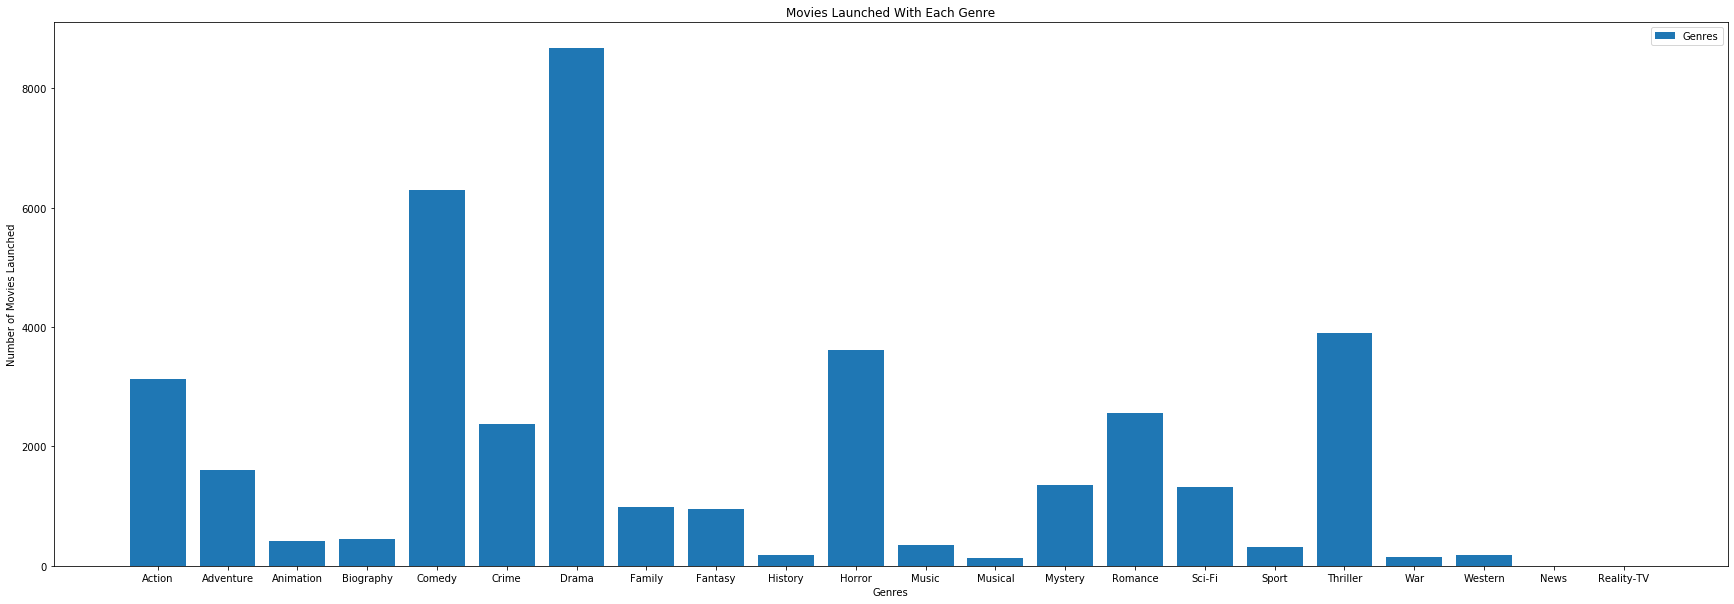

In [48]:
# Defining the figure size
plt.figure(figsize=(30,10))

# Using the bar() function to create a plot using the above values of x and y; and creating a label
plt.bar(x2,y2, label='Genres')

# Creating x and y labels
plt.xlabel('Genres')
plt.ylabel('Number of Movies Launched')

# Creating a title to the label
plt.title('Movies Launched With Each Genre')
plt.legend()

# Final plot
plt.show()

In [49]:
# Using Counter to check the largest values in my genres dictionary
k = Counter(genres_dict) 
  
# Finding 15 highest values using most_commom
genres_count = k.most_common(15)  

# Printing the top 15 most produced movies genres
print("The top 15 genres with the most movies\nlaunched between 1990 and 2020:\n") 

# Using for loop to print the list in a more readable format
for x,y in genres_count: 
    print(x,'-',y) 

The top 15 genres with the most movies
launched between 1990 and 2020:

Drama - 8676
Comedy - 6301
Thriller - 3894
Horror - 3621
Action - 3133
Romance - 2568
Crime - 2380
Adventure - 1599
Mystery - 1353
Sci-Fi - 1318
Family - 992
Fantasy - 947
Biography - 444
Animation - 418
Music - 343


Now, I will plot the top 10 genres with more movies launched.

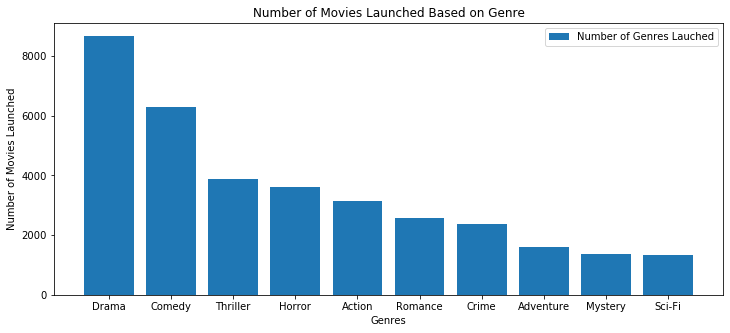

In [50]:
# Creating a variable using most_common and then converting it into a dictionary
top_10_genres = k.most_common(10)  
top_10_genres = dict(top_10_genres)

# Setting x and y up
x3 = top_10_genres.keys()
y3 = top_10_genres.values()

# Setting the figure size
plt.figure(figsize=(12,5))

# Using the bar() function to create a plot using the above values of x and y; and create labels
plt.bar(x3,y3, label='Number of Genres Lauched')
plt.xlabel('Genres')
plt.ylabel('Number of Movies Launched')
plt.savefig('destination_path.eps', format='eps')

plt.title('Number of Movies Launched Based on Genre')
plt.legend()

# Output the final plot
plt.show()

### Findings:

- The top 15 genres have the highest release of movies between 1990 and 2020 are Drama, Comedy, Horror, Thriller, Action, Biography, Adventure, Romance, Crime, History, Family, Mystery, Sci-Fi, and Music.



### Next Steps:

- Find out which are the most profitable genres.

# 6. Correlation Between Higher Budget and Higher Profits

Note: Accordingly to <a href='https://theweek.com/articles/647394/when-buy-movie-ticket-where-does-that-money'>this article</a>, studios get approximately 60% of the box office in the US. Thus, I will remove 40% of the final profit.

### 6.1 Check top movies with the highest budget

In [51]:
# First, I want to take a look of the top budget movies
df.nlargest(5, 'budget')

,original_title,year,genre,duration,country,production_company,avg_vote,budget,usa_gross_income,worlwide_gross_income,metascore,genres,genre_1,genre_2,genre_3
imdb_id,,,,,,,,,,,,,,,
tt4154796,Avengers: Endgame,2019,"Action,Adventure,Drama",181,USA,Marvel Studios,8.4,356000000.0,858373000,2.797801e+09,78.0,"Action,Adventure,Sci-Fi",Action,Adventure,Drama
tt4154756,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",149,USA,Marvel Studios,8.4,321000000.0,678815482,2.048360e+09,68.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi
tt2527336,Star Wars: Episode VIII - The Last Jedi,2017,"Action,Adventure,Fantasy",152,USA,Walt Disney Pictures,7.0,317000000.0,620181382,1.332540e+09,84.0,"Action,Adventure,Fantasy",Action,Adventure,Fantasy
tt0449088,Pirates of the Caribbean: At World's End,2007,"Action,Adventure,Fantasy",169,USA,Walt Disney Pictures,7.1,300000000.0,309420425,9.609965e+08,50.0,"Action,Adventure,Fantasy",Action,Adventure,Fantasy
tt0974015,Justice League,2017,"Action,Adventure,Fantasy",120,USA,Warner Bros.,6.3,300000000.0,229024295,6.818720e+08,45.0,"Action,Adventure,Fantasy",Action,Adventure,Fantasy


In [52]:
# Creates a dictionary with the top 5 movies with the highest budget
df_top_budget = df.filter(['original_title','budget'], axis=1)
df_top_budget.set_index('original_title',inplace=True)
budget_dict = dict(df_top_budget.nlargest(10, 'budget'))
budget_dict

{'budget': original_title
 Avengers: Endgame                                356000000.0
 Avengers: Infinity War                           321000000.0
 Star Wars: Episode VIII - The Last Jedi          317000000.0
 Pirates of the Caribbean: At World's End         300000000.0
 Justice League                                   300000000.0
 Star Wars: Episode IX - The Rise of Skywalker    275000000.0
 Solo: A Star Wars Story                          275000000.0
 Superman Returns                                 270000000.0
 Tangled                                          260000000.0
 The Lion King                                    260000000.0
 Name: budget, dtype: float64}

[Text(0, 0.5, 'Budget in Millions of Dollars'), Text(0.5, 0, 'Title')]

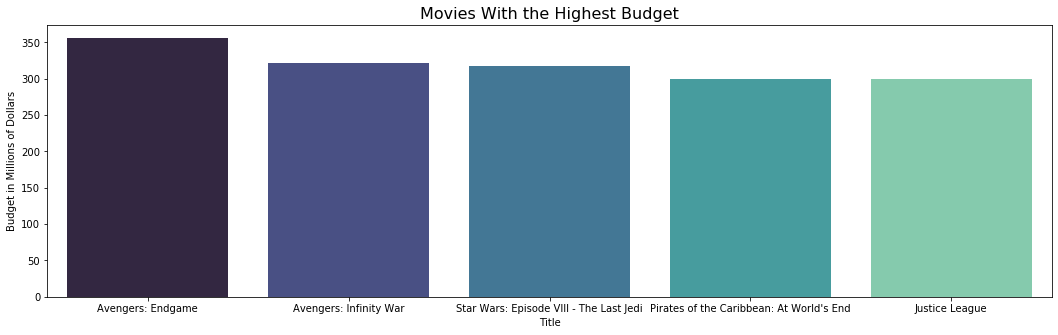

In [53]:
# The code bellow plots the top 5 highest budgets
top_budget = df.nlargest(5,'budget')
top_budget['budget_million'] = top_budget['budget']/1000000
plt.figure(figsize=(18, 5))
plt.ticklabel_format(style='plain', axis='y')
budget = sns.barplot(x='original_title', y='budget_million', data=top_budget,palette="mako")
budget.set_title('Movies With the Highest Budget', fontdict={'fontsize':16});
budget.set(xlabel='Title', ylabel='Budget in Millions of Dollars')

### 6.2 Drop null values from the budget and worldwide_gross_income columns

In [54]:
# Dropping NaN values from the budget and worlwide_gross_income columns
df.dropna(subset=['budget','worlwide_gross_income'], inplace=True)  

In [55]:
# Checking the shape of the dataset after I have dropped the NaN values
df.shape

(9320, 15)

In [56]:
# Dropping budget values that are equal to 0
df = df[df['budget'] != 0]

In [57]:
# Checking the shape of the dataset after I have dropped the 0 values
df.shape

(5937, 15)

### 6.3 Create a profit column

In [58]:
# Create column profit. Profit will be worlwide_gross_income minus budget
df['profit'] = (df['worlwide_gross_income'] - df['budget'])

In [59]:
df.head()

,original_title,year,genre,duration,country,production_company,avg_vote,budget,usa_gross_income,worlwide_gross_income,metascore,genres,genre_1,genre_2,genre_3,profit
imdb_id,,,,,,,,,,,,,,,,
tt0035423,Kate & Leopold,2001,"Comedy,Fantasy,Romance",118,USA,Konrad Pictures,6.4,48000000.0,47121859,76019048.0,44.0,"Comedy,Fantasy,Romance",Comedy,Fantasy,Romance,28019048.0
tt0097176,Deceit,1990,"Comedy,Sci-Fi",90,USA,21st Century Film Corporation,4.8,25000.0,0,0.0,NaN,"Comedy,Sci-Fi",Comedy,Sci-Fi,None,-25000.0
tt0098375,Spontaneous Combustion,1990,"Horror,Sci-Fi,Thriller",97,USA,Black Owl Productions,4.8,5500000.0,50367,50367.0,NaN,"Horror,Sci-Fi,Thriller",Horror,Sci-Fi,Thriller,-5449633.0
tt0098987,The Adventures of Ford Fairlane,1990,"Action,Adventure,Comedy",104,USA,Twentieth Century Fox,6.5,20000000.0,21413502,21413502.0,24.0,"Action,Adventure,Comedy",Action,Adventure,Comedy,1413502.0
tt0099005,Air America,1990,"Action,Comedy,War",113,USA,Carolco Pictures,5.8,35000000.0,31053601,33461269.0,33.0,"Action,Comedy,War",Action,Comedy,War,-1538731.0


<strong>IMPORTANT:</strong> Studios only take 60% of the sales ticket revenue. Thus, I am removing 40% of each value under the world_gross_income column.

In [60]:
# This lambda function takes each value under the column 'profit' and multiplies it by 0.6.
df['profit'] = df['profit'].apply(lambda x : x*0.6 if x > 0 else x)

In [61]:
# Making sure that the worlwide_gross_income and profit columns are integers
df.worlwide_gross_income.astype('int64', copy=True)
df.profit.astype(int).head()

imdb_id
tt0035423    16811428
tt0097176      -25000
tt0098375    -5449633
tt0098987      848101
tt0099005    -1538731
Name: profit, dtype: int64

In [62]:
# Movies with the highest profits
df.nlargest(5, 'profit')

,original_title,year,genre,duration,country,production_company,avg_vote,budget,usa_gross_income,worlwide_gross_income,metascore,genres,genre_1,genre_2,genre_3,profit
imdb_id,,,,,,,,,,,,,,,,
tt0499549,Avatar,2009,"Action,Adventure,Fantasy",162,USA,Twentieth Century Fox,7.8,237000000.0,760507625,2.790439e+09,83.0,"Action,Adventure,Fantasy",Action,Adventure,Fantasy,1.532063e+09
tt4154796,Avengers: Endgame,2019,"Action,Adventure,Drama",181,USA,Marvel Studios,8.4,356000000.0,858373000,2.797801e+09,78.0,"Action,Adventure,Sci-Fi",Action,Adventure,Drama,1.465080e+09
tt0120338,Titanic,1997,"Drama,Romance",194,USA,Twentieth Century Fox,7.8,200000000.0,659363944,2.195170e+09,75.0,"Drama,Romance",Drama,Romance,None,1.197102e+09
tt2488496,Star Wars: The Force Awakens,2015,"Action,Adventure,Sci-Fi",138,USA,Lucasfilm,7.9,245000000.0,936662225,2.068224e+09,80.0,"Action,Adventure,Fantasy",Action,Adventure,Sci-Fi,1.093934e+09
tt4154756,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",149,USA,Marvel Studios,8.4,321000000.0,678815482,2.048360e+09,68.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,1.036416e+09


[Text(90.0, 0.5, 'Profit in Millions of Dollars'), Text(0.5, 24.0, 'Title')]

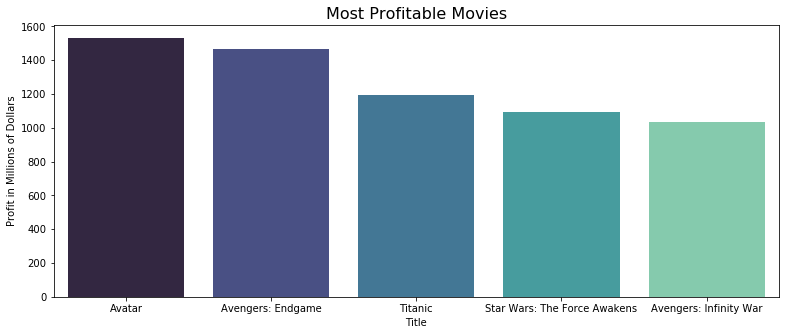

In [63]:
# Creates a barplot with the top 5 movies with the highest profits
top_profits = df.nlargest(5,'profit')
# Create a profit in millions of dollars
top_profits['profit_million'] = top_profits['profit']/1000000
top_profits['gross_income_million'] = top_profits['worlwide_gross_income']/1000000
plt.figure(figsize=(13, 5))
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('destination_path.eps', format='eps')
top_profits = sns.barplot(x='original_title', y='profit_million', data=top_profits,palette="mako")
top_profits.set_title('Most Profitable Movies', fontdict={'fontsize':16});
top_profits.set(xlabel='Title', ylabel='Profit in Millions of Dollars')

In [64]:
# Creates a dictionary and a for loop with the top 5 movies with the highest profit
df_top_profit = df.filter(['original_title','profit'], axis=1)
df_top_profit.set_index('original_title',inplace=True)
profit_dict = dict(df_top_profit.nlargest(10, 'profit')['profit'])
profit_dict

print('Most Profitable Movies (in Millions of dollars)\n')
for x,y in profit_dict.items():
    print(x,'-',y/1000000) 

Most Profitable Movies (in Millions of dollars)

Avatar - 1532.0634552000001
Avengers: Endgame - 1465.0803383999998
Titanic - 1197.1019213999998
Star Wars: The Force Awakens - 1093.9344216
Avengers: Infinity War - 1036.4158524
Jurassic World - 912.2408664
The Lion King - 838.178274
Fast & Furious 7 - 795.0288906000001
Frozen II - 780.0161598
The Avengers - 779.2885236000001


[Text(90.0, 0.5, 'Loses in Millions of Dollars'), Text(0.5, 24.0, 'Title')]

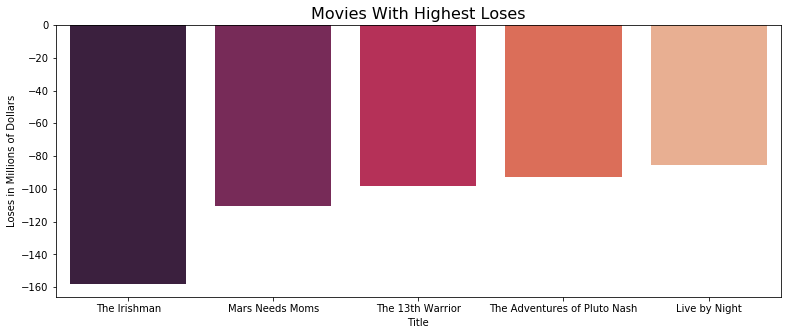

In [65]:
# Creates a barplot with the top 5 movies with the smallest profit
top_profits = df.nsmallest(5,'profit')
top_profits['profit_million'] = top_profits['profit']/1000000
top_profits['gross_income_million'] = top_profits['worlwide_gross_income']/1000000
plt.figure(figsize=(13, 5))
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('destination_path.eps', format='eps')
top_profits = sns.barplot(x='original_title', y='profit_million', data=top_profits,palette="rocket")
top_profits.set_title('Movies With Highest Loses', fontdict={'fontsize':16});
top_profits.set(xlabel='Title', ylabel='Loses in Millions of Dollars')

In [66]:
# Creates a dictionary with the top 5 movies with the smallest profit
df_top_profit = df.filter(['original_title','profit'], axis=1)
df_top_profit.set_index('original_title',inplace=True)
profit_dict = dict(df_top_profit.nsmallest(10, 'profit')['profit'])
profit_dict

{'The Irishman': -158031147.0,
 'Mars Needs Moms': -110766322.0,
 'The 13th Warrior': -98301101.0,
 'The Adventures of Pluto Nash': -92896027.0,
 'Live by Night': -85321445.0,
 'Pawn': -82995859.0,
 'The Alamo': -81180039.0,
 'Town & Country': -79627709.0,
 'Trolls World Tour': -75921732.0,
 'Supernova': -75171919.0}

### 6.4 Correlatalion between budget and higher profits

[Text(0, 0.5, 'Worldwide Gross Income'), Text(0.5, 0, 'Budget')]

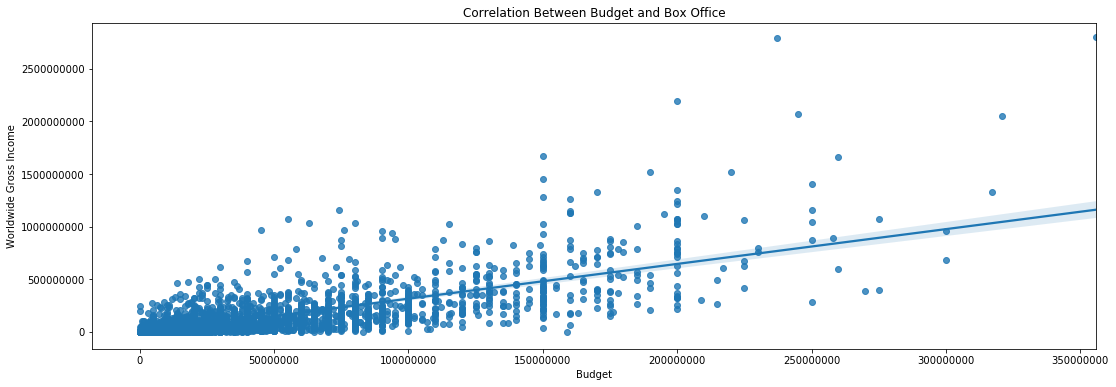

In [67]:
# Using a scatter plot to see the relation between budget and profits
plt.figure(figsize=(18, 6))
plt.savefig('destination_path.eps', format='eps')
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
ax = sns.regplot(x="budget", y="worlwide_gross_income",data=df)
ax.set_title('Correlation Between Budget and Box Office', fontdict={'fontsize':12});
ax.set(xlabel='Budget', ylabel='Worldwide Gross Income')

In [68]:
# Analysing the correlation between budget and profits
budget_revenue_corr = df.budget.corr(df.worlwide_gross_income)
budget_revenue_corr

0.7694994492945896

<Figure size 432x288 with 0 Axes>

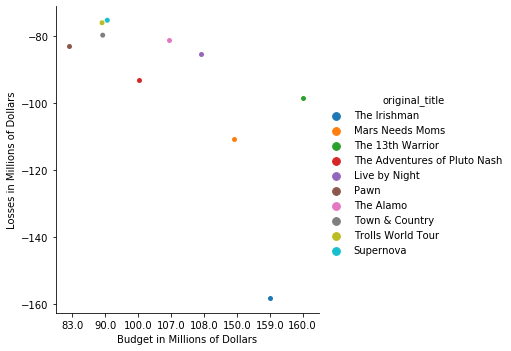

In [69]:
top_profits = df.nsmallest(10,'profit')
top_profits['profit_million'] = top_profits['profit']/1000000
top_profits['budget_million'] = top_profits['budget']/1000000
plt.savefig('destination_path.eps', format='eps')
ax = sns.catplot(x="budget_million", y="profit_million", hue="original_title", data=top_profits)
ax.set(xlabel='Budget in Millions of Dollars', ylabel='Losses in Millions of Dollars')

<strong>Takeaways:</strong> We can say that a higher budget has a strong positive correlation with higher profits.

# 7. Other Correlations

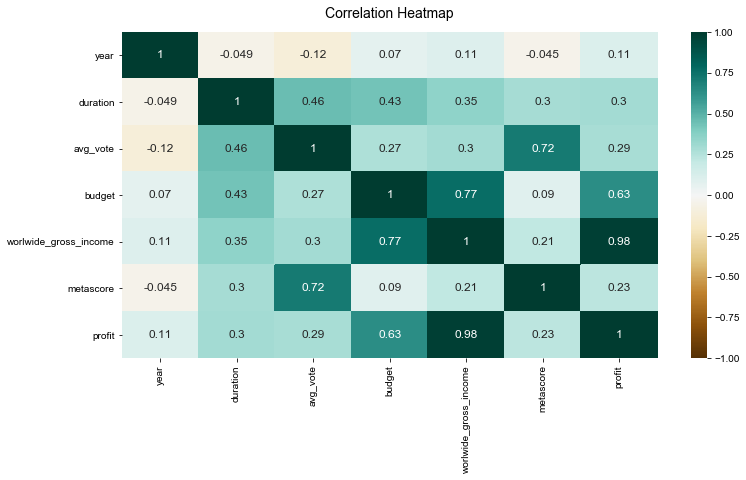

In [70]:
# Increase the size of the heatmap
plt.figure(figsize=(12, 6))
plt.savefig('destination_path.eps', format='eps')
# Store the heatmap variable to use easily when applying other features
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG',annot_kws={"size": 12})
# This fixes a randoring problem on the top and bottom of the heatmap
plt.ylim([7,0])
plt.style.use('seaborn')
# Adding a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=14);

<strong>Takeaways:</strong> 

- Higher budget and higher profits have a moderate correlation
- Budget and box office have a strong correlation
- Duration and average vote have a moderate correlation
- Budget and duration have a moderate correlation

# 8. Most Profitable Genres Group

- Find the most profitable individual genre and groups of genres - net and per dollar invested

Note: The profit column values represent the subtraction of the values in the worlwide_gross_income column by the values under the budget column minus 40%, which is the revenue margin destined to movie theaters.

### 8.1 Make a copy of the main DataFrame

In [71]:
# Dropping extra genres columns
df.drop(columns=['genres', 'genre_1', 'genre_2','genre_3'], inplace=True)

In [72]:
# Making a copy of the the main DataFrame in case something goes wrong
df_genre_mean = df.copy()

In [73]:
# Checking if the copy was successful
df_genre_mean.head(2)

,original_title,year,genre,duration,country,production_company,avg_vote,budget,usa_gross_income,worlwide_gross_income,metascore,profit
imdb_id,,,,,,,,,,,,
tt0035423,Kate & Leopold,2001,"Comedy,Fantasy,Romance",118,USA,Konrad Pictures,6.4,48000000.0,47121859,76019048.0,44.0,16811428.8
tt0097176,Deceit,1990,"Comedy,Sci-Fi",90,USA,21st Century Film Corporation,4.8,25000.0,0,0.0,NaN,-25000.0


### 8.2 Create a new data frame

A new DataFrame will be used to easily access the mean values for the groups of the genre. The new DataFrame will have values divided by 1,000,000. The objective is to make the readiness easy to be done.

In [74]:
# This code allows pandas to show all the rows
pd.set_option('display.max_rows', None)
# Group data by genre and get mean for each genre and each variable, divide by 1 million for better visibility
df_genre_mean = df_genre_mean.groupby(['genre']).mean()
df_genre_mean ['profit_million'] = df_genre_mean['profit']/1000000
df_genre_mean['return_per_dollar'] = df_genre_mean['profit']/df_genre_mean['budget']
# Delete the 'profit' column
del df_genre_mean['profit']
df_genre_mean['worlwide_gross_income'] = df_genre_mean['worlwide_gross_income']/1000000
# Delete the 'worlwide_gross_income' column
del df_genre_mean['worlwide_gross_income']
df_genre_mean['budget_million'] = df_genre_mean['budget']/1000000
# Delete the 'budget' column
del df_genre_mean['budget']
# Delete the 'year' column
del df_genre_mean['year']

In [75]:
# Checking if the new DataFrame is working properly
df_genre_mean.head()

,duration,avg_vote,metascore,profit_million,return_per_dollar,budget_million
genre,,,,,,
Action,96.666667,4.433333,37.500000,-3.541623,-0.532130,6.655556
"Action,Adventure",110.800000,5.380000,62.000000,126.257263,1.378354,91.600000
"Action,Adventure,Biography",129.000000,6.800000,50.500000,-0.627434,-0.006274,100.000000
"Action,Adventure,Comedy",104.258427,5.844944,49.197368,72.578918,1.078914,67.270337
"Action,Adventure,Crime",105.200000,5.680000,44.052632,24.016923,0.514987,46.636000


### 8.3 Most profitable group of genres (net)

In [76]:
# Sorting values by the profit_million column. It's in descending order.
df_genre_mean.sort_values(by=['profit_million'],ascending=False).head(10)

,duration,avg_vote,metascore,profit_million,return_per_dollar,budget_million
genre,,,,,,
"Family,Fantasy,Musical",129.000000,7.100000,65.000000,662.438628,4.140241,160.000000
"Animation,Adventure,Drama",93.833333,7.250000,63.000000,289.253644,3.099146,93.333333
"Action,Drama,Music",129.000000,6.300000,39.000000,231.604044,9.264162,25.000000
"Biography,Drama,Musical",105.000000,7.600000,48.000000,210.651842,2.507760,84.000000
"Action,Adventure,Sci-Fi",123.116071,6.421429,52.794393,208.141854,1.547780,134.477679
"Adventure,Drama,Fantasy",119.200000,6.610000,63.500000,197.027464,3.293672,59.820000
"Animation,Adventure,Comedy",90.944000,6.448000,58.882353,165.986085,1.808857,91.762960
"Adventure,Mystery,Sci-Fi",124.000000,7.000000,64.000000,164.012681,1.261636,130.000000
"Action,Adventure,Fantasy",114.250000,5.783333,43.343750,152.540895,1.469910,103.775694


In [77]:
# Dictionary with the group of genres with the highest profits
dict(df_genre_mean.nlargest(5,'profit_million'))['profit_million']

genre
Family,Fantasy,Musical       662.438628
Animation,Adventure,Drama    289.253644
Action,Drama,Music           231.604044
Biography,Drama,Musical      210.651842
Action,Adventure,Sci-Fi      208.141854
Name: profit_million, dtype: float64

[Text(0, 0.5, 'Profit In Millions'), Text(0.5, 0, 'Groups of Genres')]

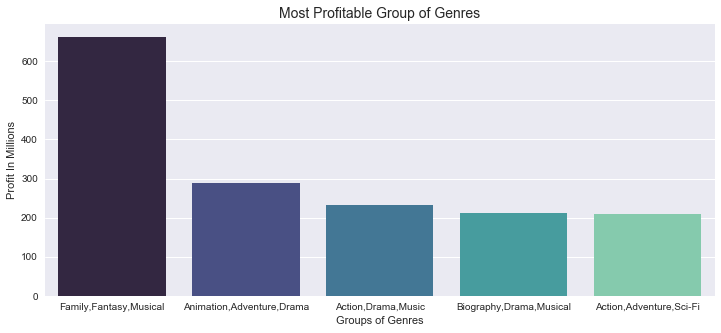

In [98]:
genre_group_net = df_genre_mean.nlargest(5,'profit_million')
plt.figure(figsize=(12, 5))
plt.savefig('destination_path.eps', format='eps')
genre_group_net = sns.barplot(x='genre', y='profit_million', data=genre_group_net.reset_index(),palette="mako")
genre_group_net.set_title('Most Profitable Group of Genres', fontdict={'fontsize':14});
genre_group_net.set(xlabel='Groups of Genres', ylabel='Profit In Millions')

### 8.4 Return per dollar invested

In [79]:
# Sorting values by the return_per_dollar column. It's in descending order.
df_genre_mean.sort_values(by=['return_per_dollar'],ascending=False).head(10)

,duration,avg_vote,metascore,profit_million,return_per_dollar,budget_million
genre,,,,,,
"Adventure,Drama,Horror",89.666667,5.833333,48.500000,10.834668,64.225864,0.168696
"Action,Comedy,Musical",76.000000,4.000000,NaN,0.014464,13.148727,0.001100
"Adventure,Drama,Western",142.000000,6.850000,58.500000,119.775265,9.981272,12.000000
"Action,Drama,Music",129.000000,6.300000,39.000000,231.604044,9.264162,25.000000
"Crime,Horror,Thriller",95.222222,5.166667,48.400000,25.982847,4.868740,5.336668
"Biography,Comedy,Romance",87.000000,5.400000,36.000000,0.288982,4.816360,0.060000
"Family,Fantasy,Musical",129.000000,7.100000,65.000000,662.438628,4.140241,160.000000
"Comedy,Musical,Romance",96.666667,5.066667,32.500000,105.811388,3.778978,28.000000
"Drama,Fantasy,Music",107.000000,6.700000,46.000000,40.364906,3.669537,11.000000


In [80]:
dict(df_genre_mean.nlargest(5,'return_per_dollar'))['return_per_dollar']

genre
Adventure,Drama,Horror     64.225864
Action,Comedy,Musical      13.148727
Adventure,Drama,Western     9.981272
Action,Drama,Music          9.264162
Crime,Horror,Thriller       4.868740
Name: return_per_dollar, dtype: float64

[Text(0, 0.5, 'Profit Per Dollar Invested'), Text(0.5, 0, 'Groups od Genre')]

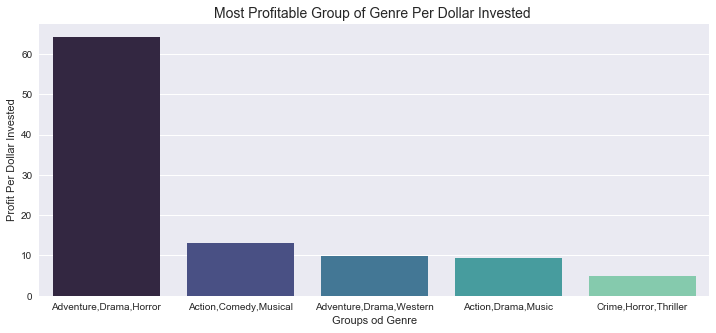

In [81]:
genre_group_roi = df_genre_mean.nlargest(5,'return_per_dollar')
plt.figure(figsize=(12, 5))
plt.savefig('destination_path.eps', format='eps')
genre_group_roi = sns.barplot(x='genre', y='return_per_dollar', data=genre_group_roi.reset_index(),palette="mako")
genre_group_roi.set_title('Most Profitable Group of Genre Per Dollar Invested ', fontdict={'fontsize':14});
genre_group_roi.set(xlabel='Groups od Genre', ylabel='Profit Per Dollar Invested')

In [82]:
# Sorting values by the return_per_dollar column. It's in descending order.
df_genre_mean.sort_values(by=['return_per_dollar'],ascending=True).head(5)

,duration,avg_vote,metascore,profit_million,return_per_dollar,budget_million
genre,,,,,,
"Adventure,Family,Musical",82.0,3.5,NaN,-1.6,-1.0,1.6
"Horror,Musical",56.0,6.4,NaN,-0.5,-1.0,0.5
"Fantasy,Romance",106.0,7.0,NaN,-1.0,-1.0,1.0
"Action,Thriller,War",92.0,4.3,39.0,-3.0,-1.0,3.0
"Family,Sport",95.0,4.5,NaN,-2.0,-1.0,2.0


# 9. Most Profitable Individual Genres

In [83]:
# Make a copy of the main DataFrame
df_copy = df.copy()
df_copy.head()

,original_title,year,genre,duration,country,production_company,avg_vote,budget,usa_gross_income,worlwide_gross_income,metascore,profit
imdb_id,,,,,,,,,,,,
tt0035423,Kate & Leopold,2001,"Comedy,Fantasy,Romance",118,USA,Konrad Pictures,6.4,48000000.0,47121859,76019048.0,44.0,16811428.8
tt0097176,Deceit,1990,"Comedy,Sci-Fi",90,USA,21st Century Film Corporation,4.8,25000.0,0,0.0,NaN,-25000.0
tt0098375,Spontaneous Combustion,1990,"Horror,Sci-Fi,Thriller",97,USA,Black Owl Productions,4.8,5500000.0,50367,50367.0,NaN,-5449633.0
tt0098987,The Adventures of Ford Fairlane,1990,"Action,Adventure,Comedy",104,USA,Twentieth Century Fox,6.5,20000000.0,21413502,21413502.0,24.0,848101.2
tt0099005,Air America,1990,"Action,Comedy,War",113,USA,Carolco Pictures,5.8,35000000.0,31053601,33461269.0,33.0,-1538731.0


### 9.1 Split the genres and create a new DataFrame

In [84]:
# Split genres and create a new entry for each of the genre a movie falls into
s = df_copy['genre'].str.split(',').apply(Series, 1).stack()
# Create a temporary DataFrame with the index and genre columns
s.index = s.index.droplevel(-1)
s.name = 'genre'
# Delete the genre column
del df_copy['genre']
df_split_genres = df_copy.join(s)

In [85]:
# Check entries (should be a lot more rows since the most movies have more than one genre)
df_split_genres.shape

(14497, 12)

In [86]:
# This code allows pandas to show all the rows
pd.set_option('display.max_rows', None)
# Group data by genre and get mean for each genre and each variable, divide by 1 million for better visibility
df_per_genre = df_split_genres.groupby(['genre']).mean()
df_per_genre ['profit_million'] = df_per_genre['profit']/1000000
df_per_genre ['return_per_dollar'] = df_per_genre['profit']/df_per_genre['budget']
# Delete the 'profit' column
del df_per_genre['profit']
df_per_genre['worlwide_gross_income'] = df_per_genre['worlwide_gross_income']/1000000
# Delete the 'worlwide_gross_income' column
del df_per_genre['worlwide_gross_income']
df_per_genre['budget_million'] = df_per_genre['budget']/1000000
# Delete the 'budget' column
del df_per_genre['budget']
# Delete the 'year' column
del df_per_genre['year']

### 9.2 Most profitable individual genre

In [87]:
df_per_genre.sort_values(by=['profit_million'],ascending=False).head(10)

,duration,avg_vote,metascore,profit_million,return_per_dollar,budget_million
genre,,,,,,
Animation,89.919028,6.387045,59.138095,121.788071,1.588840,76.652212
Adventure,106.364162,6.095260,52.237772,104.248915,1.368292,76.189095
Sci-Fi,106.379863,5.723570,49.854785,68.416803,1.188757,57.553222
Action,106.648629,5.810967,48.109360,53.555004,1.010831,52.981172
Fantasy,103.828638,5.788967,46.408537,49.365756,1.072056,46.047739
Musical,103.051282,5.823077,51.760000,37.693947,1.523878,24.735541
Family,97.880109,5.680381,47.745387,35.663431,0.908323,39.262931
Comedy,98.367184,5.860848,49.316826,24.881062,0.957135,25.995360
Mystery,103.269750,5.905588,49.589474,21.254913,0.953006,22.303031


In [88]:
dict(df_per_genre.nlargest(5,'profit_million'))['profit_million']

genre
Animation    121.788071
Adventure    104.248915
Sci-Fi        68.416803
Action        53.555004
Fantasy       49.365756
Name: profit_million, dtype: float64

[Text(0, 0.5, 'Profit Per Dollar Invested'), Text(0.5, 0, 'Genre')]

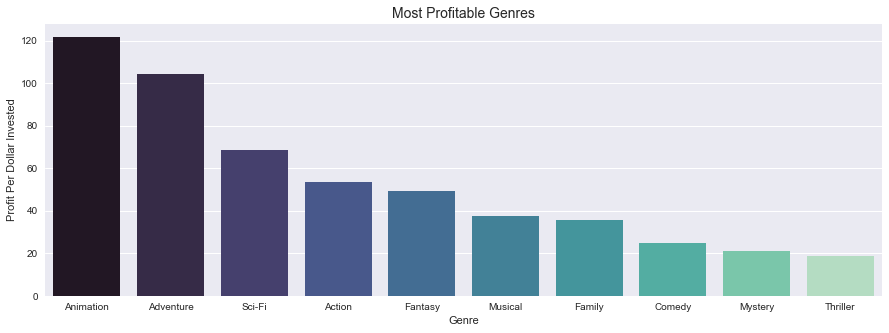

In [89]:
genre_roi = df_per_genre.nlargest(10,'profit_million')
plt.figure(figsize=(15, 5))
plt.savefig('destination_path.eps', format='eps')
genre_roi = sns.barplot(x='genre', y='profit_million', data=genre_roi.reset_index(),palette="mako")
genre_roi.set_title('Most Profitable Genres', fontdict={'fontsize':14});
genre_roi.set(xlabel='Genre', ylabel='Profit Per Dollar Invested')

### 9.3 Return per dollar invested

In [90]:
# Sorting the value by the 'return_per_dollar'
df_per_genre.sort_values(by=['return_per_dollar'],ascending=False).head(10)

,duration,avg_vote,metascore,profit_million,return_per_dollar,budget_million
genre,,,,,,
Animation,89.919028,6.387045,59.138095,121.788071,1.588840,76.652212
Musical,103.051282,5.823077,51.760000,37.693947,1.523878,24.735541
Adventure,106.364162,6.095260,52.237772,104.248915,1.368292,76.189095
Sci-Fi,106.379863,5.723570,49.854785,68.416803,1.188757,57.553222
Fantasy,103.828638,5.788967,46.408537,49.365756,1.072056,46.047739
Action,106.648629,5.810967,48.109360,53.555004,1.010831,52.981172
Comedy,98.367184,5.860848,49.316826,24.881062,0.957135,25.995360
Horror,94.227384,5.080807,44.004556,10.890458,0.954838,11.405553
Mystery,103.269750,5.905588,49.589474,21.254913,0.953006,22.303031


In [91]:
dict(df_per_genre.nlargest(5,'return_per_dollar'))['return_per_dollar']

genre
Animation    1.588840
Musical      1.523878
Adventure    1.368292
Sci-Fi       1.188757
Fantasy      1.072056
Name: return_per_dollar, dtype: float64

[Text(0, 0.5, 'Profit Per Dollar Invested'), Text(0.5, 0, 'Genre')]

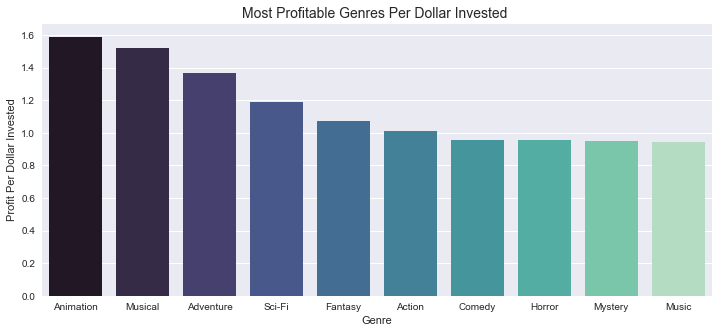

In [92]:
genre_roi = df_per_genre.nlargest(10,'return_per_dollar')
plt.figure(figsize=(12, 5))
plt.savefig('destination_path.eps', format='eps')
genre_roi = sns.barplot(x='genre', y='return_per_dollar', data=genre_roi.reset_index(),palette="mako")
genre_roi.set_title('Most Profitable Genres Per Dollar Invested ', fontdict={'fontsize':14});
genre_roi.set(xlabel='Genre', ylabel='Profit Per Dollar Invested')

In [93]:
# Sorting the value by the 'return_per_dollar' 
df_per_genre.sort_values(by=['return_per_dollar'],ascending=True).head(5)

,duration,avg_vote,metascore,profit_million,return_per_dollar,budget_million
genre,,,,,,
Sport,108.946667,6.226667,50.754386,7.374504,0.323485,22.797074
War,118.133333,6.350000,56.166667,10.771316,0.397544,27.094667
History,128.259615,6.710577,60.494382,14.434155,0.399704,36.112111
Crime,104.691556,6.068000,50.931298,12.419001,0.523399,23.727599
Biography,119.857143,6.849817,60.587045,15.760444,0.591848,26.629194


In [94]:
dict(df_per_genre.nsmallest(5,'return_per_dollar'))['return_per_dollar']

genre
Sport        0.323485
War          0.397544
History      0.399704
Crime        0.523399
Biography    0.591848
Name: return_per_dollar, dtype: float64

[Text(0, 0.5, 'Profit Per Dollar Invested'), Text(0.5, 0, 'Genre')]

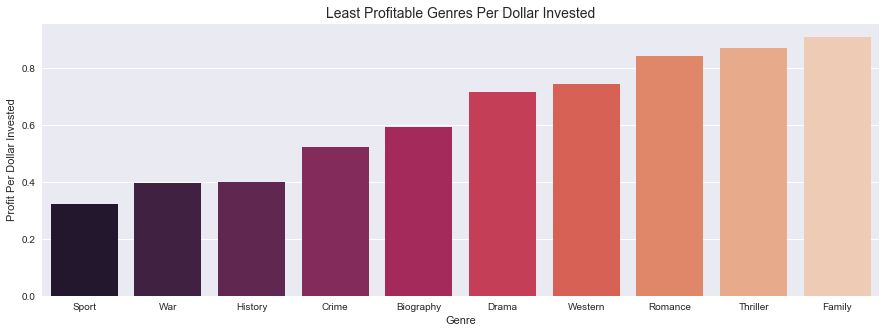

In [95]:
genre_roi = df_per_genre.nsmallest(10,'return_per_dollar')
plt.figure(figsize=(15, 5))
genre_roi = sns.barplot(x='genre', y='return_per_dollar', data=genre_roi.reset_index(),palette="rocket")
genre_roi.set_title('Least Profitable Genres Per Dollar Invested', fontdict={'fontsize':14});
genre_roi.set(xlabel='Genre', ylabel='Profit Per Dollar Invested')


# 10. Final Takeaways and Recommendations

#### Out of the top 20 most profitable movies:
   - 18 of them are part of a franchise of movies
   - 13 of them are continuations of previous movies
   - 5 of them are the first movie of a franchise
   - 2 of them haven't had a continuation yet, but they are underway
   - Only Beauty and the Best and Titanic aren't part of a franchise yet.

    
    
#### Correlation between the data:
   - Higher budgets and higher box office are positively correlated. However, it is not guaranteed that a higher budget will bring higher revenue. It will depend on the quality and reception of the final product
   - Higher budget and higher profits have a positive moderate correlation
   - Budget and box office have a strong positive correlation
   - Duration and average vote have a moderate correlation
   - Budget and duration have a moderate correlation



#### The genres with more movies launched between 1990 and 2020 are:
   - Drama, Comedy, Horror, Thriller, Action, Biography, Adventure, Romance, and Crime.


#### The groups of genres that are doing the highest in box office revenue are:
    - Family, Fantasy, Musical       662.438628 million dollars 
    - Animation, Adventure, Drama    289.253644 million dollars
    - Action, Drama, Music           231.604044 million dollars
    - Biography, Drama, Musical      210.651842 million dollars
    - Action, Adventure, Sci-Fi      208.141854 million dollars
    
#### The group of genres that bring the highest ROI (per dollar invested) are:    
    
    - Adventure,Drama,Horror     64.225864 dollars
    - Action,Comedy,Musical      13.148727 dollars
    - Adventure,Drama,Western     9.981272 dollars
    - Action,Drama,Music          9.264162 dollars
    - Crime,Horror,Thriller       4.868740 dollars

#### The individual genres that bring the highest in box office reveue are:
    - Animation    121.788071 million dollars
    - Adventure    104.248915 million dollars
    - Sci-Fi        68.416803 million dollars
    - Action        53.555004 million dollars
    - Fantasy       49.365756 million dollars

#### The individual genre that bring the highest ROI per dolar invested are
    - Animation    1.588840 dollars
    - Musical      1.523878 dollars
    - Adventure    1.368292 dollars
    - Sci-Fi       1.188757 dollars
    - Fantasy      1.072056 dollars
    
#### The individual genre that bring the lowest ROI per dolar invested are    
    - Sport        0.323485 dollars
    - War          0.397544 dollars
    - History      0.399704 dollars
    - Crime        0.523399 dollars
    - Biography    0.591848 dollars

### Recommendations

- Invest in franchises, such as Halo and Gears.
- Invest in movies that grab all the public.
- Drama and Comedy might face higher competition since they are in larger quantities.
- Animation, Adventure, and Sci-Fi bring the highest profits. It is a good idea to invest on them.